In [143]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


In [144]:
def FLBZ(ar,num,m,p):
    if p>=0.5 or p<0:
        print('p value out of range')
        return
    
    max_elem = np.max(ar)
    min_elem = np.min(ar)
    # padding the array with -inf and inf
    ar = np.insert(ar,0,min_elem-1)
    ar = np.append(ar,max_elem+1)
    
    n = len(ar)
    
    a = math.sqrt(p)/(math.sqrt(p)+math.sqrt(1-p))
    if a<=p or a>=0.5:
        print('alpha value out of range',a)
        return
    
    
    
    
    # creating the intervals pdf
    q = np.ones(n)/n
    
    for k in range(m):
        # print('q : ',np.round(q,2))
        # print('sum q : ',np.sum(q))
        sum = 0
        j = -1
        while sum<=0.5:
            j = j + 1
            sum = sum + q[j]
            # print(sum)
        p_star = (sum-0.5)/q[j]
        ch = (random.random()<p_star)
        j_star = j-1 if ch else j
        Y = 1 if ar[j_star]<num else 0
        N = 1 if random.random()<p else 0
        Y = Y ^ N
        t = 2*(sum-0.5) if j_star==j else 2*(sum-q[j]-0.5)
        for i in range(n):
            if ((Y)==(i>=j_star)):
                q[i] = (2*(1-a)*q[i])/(1+(1-2*Y)*(1-2*a)*t)
            else:
                q[i] = (2*(a)*q[i])/(1+(1-2*Y)*(1-2*a)*t)
        q = q/np.sum(q)
    l = np.argmax(q)
    return l
        

In [145]:
def FL_NoisySorting(ar,M,p):
    n = len(ar)
    
    # creating  a1 length array and pushing ar[last] into it
    sigma = np.ones(1)*ar[n-1]
    
    # print(sigma)
    for i in range(2,n+1):
        num = ar[n-i]
        l = FLBZ(sigma,num,math.floor(M/n),p)
        sigma = np.concatenate((sigma[0:l],np.array([num]),sigma[l:]))
        # print('l = ',l)
        # print('concatenating : ',sigma[0:l],np.array([num]),sigma[l:])
        # print(sigma)
    
    return sigma

In [146]:
def mergeSort(arr, n):
    temp_arr = [0]*n
    return _mergeSort(arr, temp_arr, 0, n-1)
 
 
 
def _mergeSort(arr, temp_arr, left, right): 
    inv_count = 0
 
    if left < right:
        mid = (left + right)//2
        inv_count += _mergeSort(arr, temp_arr, left, mid)
        inv_count += _mergeSort(arr, temp_arr, mid + 1, right)
        inv_count += merge(arr, temp_arr, left, mid, right)
    return inv_count
 
def merge(arr, temp_arr, left, mid, right):
    i = left     # Starting index of left subarray
    j = mid + 1  # Starting index of right subarray
    k = left     # Starting index of to be sorted subarray
    inv_count = 0
    while i <= mid and j <= right:
        if arr[i] <= arr[j]:
            temp_arr[k] = arr[i]
            k += 1
            i += 1
        else:
            temp_arr[k] = arr[j]
            inv_count += (mid-i + 1)
            k += 1
            j += 1
 
    while i <= mid:
        temp_arr[k] = arr[i]
        k += 1
        i += 1
 
    while j <= right:
        temp_arr[k] = arr[j]
        k += 1
        j += 1
 
    for loop_var in range(left, right + 1):
        arr[loop_var] = temp_arr[loop_var]
 
    return inv_count


In [157]:
def test_FLBZ_NoisySorting(N,a,b,M,p):
    # tests the FLBZ Noisy Sorting algo by on N-length random array of numbers [a,b]
    ar = np.random.randint(a, b + 1, size=N) # generating the random array

    br = (FL_NoisySorting(ar,M,p))
    br = np.floor(br).astype(int) 
    n = len(br)
    # print('original array : \t',np.array(ar))
    # print('sorted array : \t\t',br)
    num_inversions = mergeSort(br,n)
    inversion_fraction = round(num_inversions/(n*(n-1)/2),4)
    # print('inversion percentage : ',inversion_fraction*100,'%')
    # print('sorted array : ',br)
    return inversion_fraction



In [178]:
# takes an input crossover probability and verifies the probability of error for large N
def verifyRate(p):
    
    
    # calculating g(p)
    g = 0.5 + math.sqrt(p*(1-p))
    
    # calculating upper bound on R
    R_upper = 0.5*math.log2(1/g)
    
    # choosing a random value in the bounds
    R = (random.uniform(0.1,R_upper))
    
    error_prob = np.array([])
    N_max = 100
    for n in range(10,N_max+1):
        a,b = 0,math.ceil(n**(1.3))
        M = math.ceil(n*math.log2(n)/R)
        inv = test_FLBZ_NoisySorting(n,a,b,M,p)
        error_prob = np.append(error_prob,inv)
    
    k = 10
    k_window_avg = np.zeros(len(error_prob))

    for i in range(len(error_prob)):
        start = max(0, i - k + 1)
        end = i + 1
        k_window_avg[i] = np.mean(error_prob[start:end])
    
    
    # print(error_prob)
    plt.figure(figsize=(8, 4))
    plt.plot(k_window_avg, linestyle='-', markersize=5)
    plt.xlabel('N')
    plt.ylabel('Error_Probability')
    plt.title('Plot of Error_prob with respect to N (Interpolated)')
    plt.grid(True)

    # Show the plot
    plt.show()
        
        
    

In [134]:
print('Outputs for some trivial cases : ')
m = 1000
p = 0.3
print('ans = ',str(FLBZ([1,3,8,12],0,m,p)),' expected =',0)
print('ans = ',str(FLBZ([1,3,8,12],2,m,p)),' expected =',1)
print('ans = ',str(FLBZ([1,3,8,12],6,m,p)),' expected =',2)
print('ans = ',str(FLBZ([1,3,8,12],10,m,p)),' expected =',3)
print('ans = ',str(FLBZ([1,3,8,12],16,m,p)),' expected =',4)


Outputs for some trivial cases : 
ans =  0  expected = 0
ans =  1  expected = 1
ans =  2  expected = 2
ans =  3  expected = 3
ans =  3  expected = 4


In [140]:
N = 10 # length of ar to be generated randomly
a,b = 1,100 # range of numbers in the array [a,b]
M = 1000;# error probability tolerated for each VLBZ * n
p = 0.30 # crossover probability

res = test_FLBZ_NoisySorting(N,a,b,M,p)

inversion percentage :  0.0 %
sorted array :  [20 28 30 33 38 49 57 59 80 92]


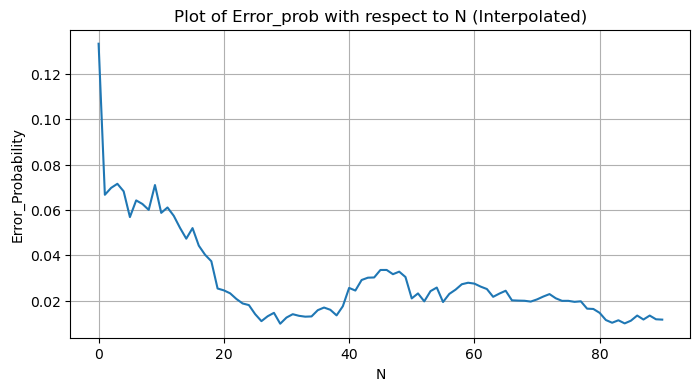

In [179]:
verifyRate(0.1)